In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Titanic dataset')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualisation

<Axes: xlabel='Sex', ylabel='count'>

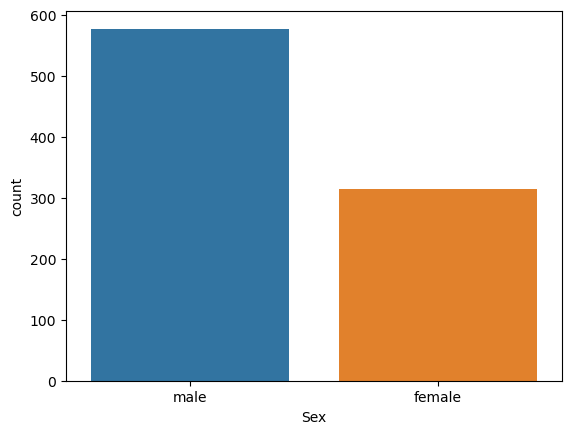

In [6]:
sns.countplot(data=df,x='Sex')

<Axes: xlabel='Survived', ylabel='count'>

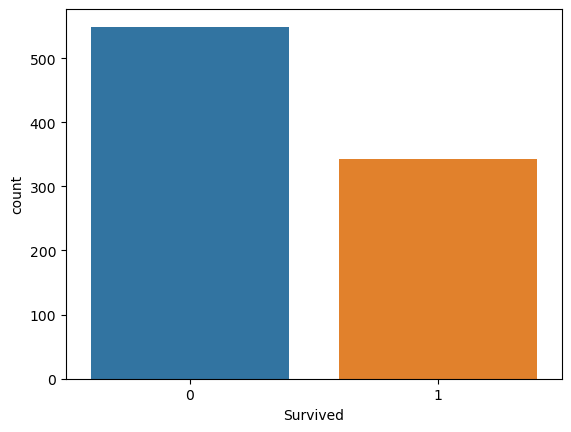

In [7]:
sns.countplot(df,x='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

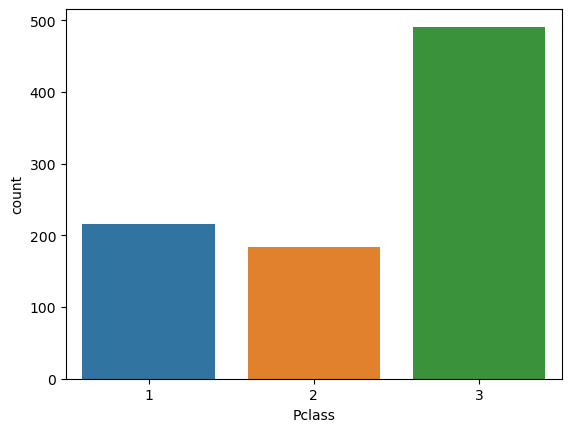

In [8]:
sns.countplot(data=df, x='Pclass')

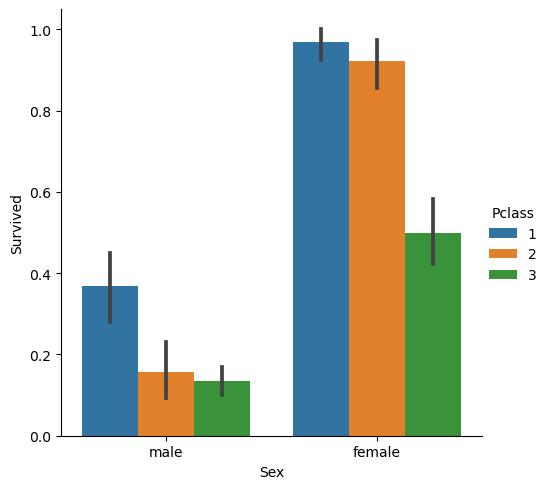

In [10]:
sns.catplot(x='Sex',y='Survived',hue='Pclass',data=df,kind='bar')

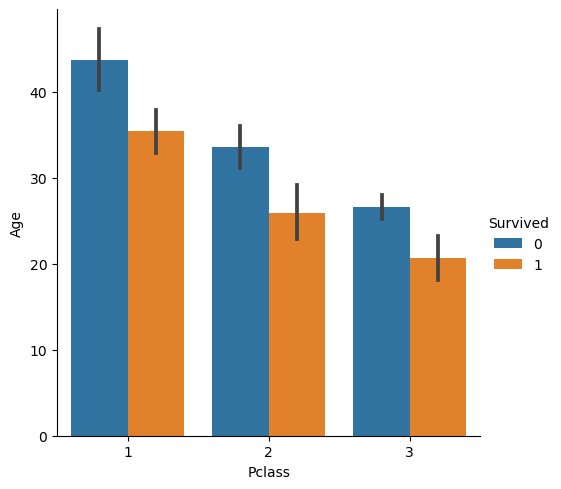

In [13]:
sns.catplot(x='Pclass',y='Age',hue='Survived',data=df,kind='bar')

In [ ]:
We can see that class 1 has more survivng rate as they have more facilities given as their fare is high. More females were 
survived than males.

# Preprocessing

In [14]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [15]:
import scipy.stats as st

In [16]:
st.mode(df['Embarked'])


ModeResult(mode=array(['S'], dtype=object), count=array([644]))

In [17]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
lb=LabelEncoder()
std=StandardScaler()

In [19]:
df['Sex']=lb.fit_transform(df['Sex'])
df['Embarked']=lb.fit_transform(df['Embarked'])

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0


In [21]:
x=df.drop(columns=['PassengerId','Name','Cabin','Ticket','Survived'], axis=1)

In [22]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [42]:
x=std.fit_transform(x)

In [23]:
y=df.loc[:,'Survived']

In [24]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [43]:
x.shape

(891, 7)

In [26]:
y.shape

(891,)

In [29]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smt=SMOTE()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [45]:
print(x_train.shape,x_test.shape)

(712, 7) (179, 7)


In [46]:
xtrain,ytrain=smt.fit_resample(x_train,y_train)

In [47]:
LR=LogisticRegression()
SV=SVC()
DTC=DecisionTreeClassifier()
model=[LR,SV,DTC]
for i in model:
    print(i)
    i.fit(xtrain,ytrain)
    pred=i.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    

LogisticRegression()
0.8212290502793296
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       105
           1       0.75      0.85      0.80        74

    accuracy                           0.82       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.83      0.82      0.82       179

SVC()
0.8156424581005587
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

DecisionTreeClassifier()
0.7486033519553073
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       105
           1       0.69      0.70      0.70        74

    accuracy                           0.75       179
   macro avg       

In [ ]:
Here I got higher accuracy with LogisticRegression model.

# Predicting system

In [49]:
t=np.array([3,1,22.000000,1,0,7.2500,2])
t=t.reshape(1,-1)
p=LR.predict(t)
print(p)

[0]


In [ ]:
t is first row of same data. It has given the correct prediction.